# Numpy and Pandas

## Numpy 

Numpy works mostly with arrays, much like Matlab and R.

Here I'll briefly show some of the functionality of Numpy.

In [3]:
import numpy as np

#### Creating arrays

In [ ]:
np.ones(3)

In [ ]:
np.zeros(3)

In [ ]:
np.identity(3)

In [ ]:
np.diagonal(np.identity(3))

In [ ]:
np.arange(2,10,2) #(start, stop, step)

In [ ]:
np.linspace(2,8,4) #(start, stop, number of elements)

Nested lists make a matrix:

In [ ]:
m = np.array([[1,2,3],[4,5,6],[7,8,9]])
m

Slicing works the same way as lists, but with two indices instead of one:

In [ ]:
m

In [ ]:
m[:2,:2]

#### Linear Algebra Operations

In [ ]:
I = np.identity(3)/2
I

In [ ]:
np.linalg.inv(I)

In [ ]:
np.trace(I)

In [ ]:
np.linalg.eigvals(I)

### Warning: Copying in Numpy
What is the difference between these two blocks?

In [ ]:
m = np.arange(1,10,1).reshape(3,3)
m1 = m
m1[0,1] = 0
m

In [ ]:
m = np.arange(1,10,1).reshape(3,3)
m2 = np.copy(m)
m2[0,1] = 0
m

### Important thing about Arrays:
When creating a subset of the array like m1, it is a __view__ and __not a copy__.

This means if you edit it, it will actually edit the original one.

Basic numpy practice is to use "np.copy" to create a new version that you can edit without affecting the underlying array.

Also edits it if you assign values to a slice.

In [ ]:
ex = m[2]
ex[1] = 0
m

### Random Number Generation
In our last example, I prespecified a list. The way I made that list was using numpy functions.



In [ ]:
np.random.randn(100) # This generates 100 draws from N(0,1)

Instead of using for loops, we can do matrix calculations.

In [4]:
X = np.random.randn(100,1)
e = np.random.randn(100,1)

Y = 2*X + e
Y

array([[ 1.21709911],
       [-0.26886886],
       [-3.58767558],
       [ 0.17387136],
       [-0.66004256],
       [ 1.75693309],
       [ 0.69265597],
       [-0.13307657],
       [ 4.15727843],
       [ 1.6844106 ],
       [-5.93272768],
       [-0.77130249],
       [-2.43696428],
       [-1.4390208 ],
       [-3.04919791],
       [ 0.60066223],
       [-0.45489907],
       [ 2.6790602 ],
       [-0.67847506],
       [ 2.94356729],
       [ 0.58883599],
       [ 0.07115315],
       [-1.66681409],
       [ 3.19146611],
       [ 0.24686768],
       [ 1.32141942],
       [ 1.03558902],
       [-2.44688689],
       [ 2.11741648],
       [-2.57094373],
       [-4.61143476],
       [-2.32013256],
       [ 1.15471032],
       [ 1.8998411 ],
       [-3.76531958],
       [-2.16177416],
       [ 0.10089116],
       [ 0.40431683],
       [ 0.05190697],
       [ 1.0670552 ],
       [-0.27479148],
       [-6.79701825],
       [ 2.81347151],
       [-5.64671562],
       [ 3.77450114],
       [ 1

Numpy could estimate the linear regression parameter two different ways:
- Matrix way.
- Numerical way.

#### The matrix way. 

What's the formula?

$$ \beta = (X'X)^{-1}(X'Y)?$$

$\beta = (X'X)^{-1}(X'Y)$

In [ ]:
XX_inv = np.linalg.inv(X.T@X)

beta_hat = XX_inv@(X.T@Y)
beta_hat

Easy as that!

#### The numerical way

I'll use the SSE function we used before, but instead of using a for loop to determine things I will use:
- Matrix operations to find SSE
- A list comprehension to calculate SSE for different $\beta$
- The function "np.argmin" to find the array element with the smallest value.

In [ ]:
def sse(beta,X,Y):
    sse = ((Y- X*beta)**2).sum()
    return sse

beta_grid = [-1,0,1,2,3,4]

sse_vals = np.array([sse(b,X,Y) for b in beta_grid])

beta_grid[np.argmin(sse_vals)] # argmin tells me the index 
                               # for the element of the array with the smallest value

and __voila!__ We can do linear regression with numpy arrays either numerically or with the matrix formula.

### Some other Numpy things that you will find to be useful
- Indexing arrays:
    - Just like lists, you can use slices like `array[::2]`
    - Or pass Boolean vectors to subset: `array[array<2]`
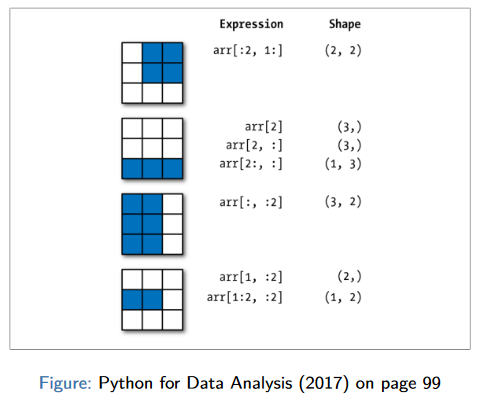
<center>from PyEcon slideshow, slide 118: https://pyecon.org/down/pyecon.pdf </center>


- Concatenating arrays:
    - As long as the dimensions align, you can concatenate by specifying "axis": `np.concatenate([arr1,arr2],axis=0)`
    - Cheat sheet: `axis=0` is the __row axis__, `axis=1` is the __column axis__.

In [ ]:
np.concatenate([m,m],axis=1)

In [ ]:
np.concatenate([m,m],axis=0)

## Pandas

The two main objects of Pandas:

- `pd.Series()`, which is only one dimension.
- `pd.DataFrame()`, which is two dimensions.

The functionality is similar to the dataframes in R.

What I love about DataFrames, however, is the number of built-in methods!

In [1]:
import pandas as pd

In [5]:
the_array = np.concatenate([X,Y],axis=1)
the_array

array([[ 4.81828045e-01,  1.21709911e+00],
       [ 1.80224518e-01, -2.68868861e-01],
       [-1.20326413e+00, -3.58767558e+00],
       [ 5.92191539e-02,  1.73871363e-01],
       [-5.14027013e-01, -6.60042561e-01],
       [ 4.42861633e-01,  1.75693309e+00],
       [ 2.95100240e-01,  6.92655967e-01],
       [-4.58394630e-01, -1.33076570e-01],
       [ 1.78588915e+00,  4.15727843e+00],
       [ 1.35706074e+00,  1.68441060e+00],
       [-2.05168014e+00, -5.93272768e+00],
       [-1.30391263e+00, -7.71302492e-01],
       [-8.70622363e-01, -2.43696428e+00],
       [-1.42984861e+00, -1.43902080e+00],
       [-1.52769037e+00, -3.04919791e+00],
       [ 8.61941498e-01,  6.00662225e-01],
       [ 5.48884628e-01, -4.54899069e-01],
       [ 7.52919257e-01,  2.67906020e+00],
       [ 2.45605130e-01, -6.78475061e-01],
       [ 1.00151821e+00,  2.94356729e+00],
       [ 3.08694238e-01,  5.88835986e-01],
       [-5.84257857e-02,  7.11531492e-02],
       [-4.62007322e-01, -1.66681409e+00],
       [ 1.

In [6]:
df = pd.DataFrame(the_array,columns=['X','Y'])
df.head()

,X,Y
0,0.481828,1.217099
1,0.180225,-0.268869
2,-1.203264,-3.587676
3,0.059219,0.173871
4,-0.514027,-0.660043


Pandas can also convert dictionaries to DataFrames very easily:

In [7]:
Babies = {"Bart Harley Jarvis":{
                "Description" : "Underbite, flat back of the head",
                "Weight Percentile" : 50,
                "Height Percentile" : 80 },
          "Michael Patrick Porkins":{
                "Description" : "Button nose, apple cheeks",
                "Weight Percentile" : 99,
                "Height Percentile" : 10},
          "Taffy Lee Fubbins" : {
                "Description" : "Tuna can",
                "Weight Percentile" : 90,
                "Height Percentile" : 10}}

In [8]:
pd.DataFrame(Babies).T

,Description,Weight Percentile,Height Percentile
Bart Harley Jarvis,"Underbite, flat back of the head",50,80
Michael Patrick Porkins,"Button nose, apple cheeks",99,10
Taffy Lee Fubbins,Tuna can,90,10


Selecting one column returns a Series:

In [15]:
df['X'].head()

0    0.481828
1    0.180225
2   -1.203264
3    0.059219
4   -0.514027
Name: X, dtype: float64

Selecting more columns returns a DataFrame

In [16]:
df[['X','Y']].head()

,X,Y
0,0.481828,1.217099
1,0.180225,-0.268869
2,-1.203264,-3.587676
3,0.059219,0.173871
4,-0.514027,-0.660043


You can also pass slices just like in arrays, with one critical difference: Pandas indices are __labeled__.

Thus you need to tell Pandas whether you are giving it a label or a positional index.

- `.loc` is for labeled indices.
- `.iloc` is for positional indices (integer based).

In [17]:
df.loc[0,"X"]

0.48182804458025347

In [18]:
df.iloc[0,"X"]

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [19]:
df.iloc[2,1]

-3.5876755819259794

In [20]:
df.loc[2,1]

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [1] of <class 'int'>

### Indexing using Boolean arrays
When you pass a DataFrame a Boolean array, it subsets the data to the rows where the value is `True`

As long as you understand this, you can do subsetting __very__ easily in Pandas:

In [21]:
# On axis 1
df.iloc[:,[True,False]].head()

,X
0,0.481828
1,0.180225
2,-1.203264
3,0.059219
4,-0.514027


In [23]:
# On axis 0
df.iloc[[True,False]*20,:].head()

IndexError: Boolean index has wrong length: 40 instead of 100

__What did I just do with the code  `df.iloc[[True,False]*50,:].head()`__?

Step by step:

`[True,False]` is a list with two booleans.


`[True,False]*50` is that array duplicated 50 times (total length 100)

`df.iloc[[True,False]*50,:]` passed the 100 length list to the first axis (rows). This subsets the dataframe to be every other row.

`df.iloc[[True,False]*50,:].head()` returns the first 5 rows of the dataframe.

Writing good code, I would have spelled these steps out one by one instead of doing only one line and being lazy...

__Why is this useful?__

I can create a boolean Series just by applying a condition to a Series:

`df['X'] > 0`

I can feed this boolean array into the index:

In [29]:
df[(df['X']>0)&(df['Y']<0)]['Y'].max()

-0.227126517352908

By default, feeding it into brackets feeds it into the first axis.

But if I feed it a label, it also knows to first check whether this is a column.

This is part of why Python is easy to use, but also __easy to screw things up__.

### Methods
This is one of the reasons I got hooked on Python. Pandas DataFrames have several built-in methods that make data manipulation __very easy__.

Also, there are ways to easily apply your own functions to dataframes, which is good for data cleaning.

Some key ones:
- built in data frame methods
- `groupby()`
- `apply()` and `map()`

#### Stats functions.
All of the major moments:

In [34]:
df.mean(), df.std(), df.var(), df.skew(), df.kurtosis()

(X   -0.054574
 Y   -0.205073
 dtype: float64,
 X    1.202435
 Y    2.677916
 dtype: float64,
 X    1.445850
 Y    7.171232
 dtype: float64,
 X   -0.086326
 Y   -0.207869
 dtype: float64,
 X    0.020696
 Y    0.175279
 dtype: float64)

Correlations:

In [36]:
df.corr()['Y']

X    0.919251
Y    1.000000
Name: Y, dtype: float64

#### Sequential operations.
Such as differences and shifts:

In [37]:
df['D_X'] = df['X'].diff()
df['L_X'] = df['X'].shift()

df.head()

,X,Y,D_X,L_X
0,0.481828,1.217099,NaN,NaN
1,0.180225,-0.268869,-0.301604,0.481828
2,-1.203264,-3.587676,-1.383489,0.180225
3,0.059219,0.173871,1.262483,-1.203264
4,-0.514027,-0.660043,-0.573246,0.059219


Even random things like "percent change"

In [38]:
df['X'].pct_change()

0          NaN
1    -0.625957
2    -7.676473
3    -1.049215
4    -9.680080
        ...   
95   -1.098217
96   -0.885206
97    3.877200
98   -4.949663
99    1.313587
Name: X, Length: 100, dtype: float64

#### Useful data exploration ones:

In [39]:
# How many non-null values are there?
df['D_X'].count()

99

In [40]:
df['D_X_neg'] = df['D_X']<0
# How many unique values are there?
df['D_X_neg'].nunique()

2

In [46]:
df['D_X_neg'].value_counts()

False    51
True     49
Name: D_X_neg, dtype: int64

In [41]:
# What are those unique values?
df['D_X_neg'].unique()

array([False,  True])

In [51]:
df.describe()

,X,Y,D_X,L_X
count,100.000000,100.000000,99.000000,99.000000
mean,-0.054574,-0.205073,-0.013671,-0.046321
std,1.202435,2.677916,1.718540,1.205705
min,-2.826256,-6.797018,-5.104807,-2.826256
25%,-0.870862,-2.175778,-1.016409,-0.805091
50%,0.166006,0.137381,0.033110,0.170361
75%,0.680335,1.373352,0.848287,0.683374
max,3.078430,7.463119,4.108856,3.078430


In [56]:
df[['D_X',"Y"]].drop_duplicates()

,D_X,Y
0,NaN,1.217099
1,-0.301604,-0.268869
2,-1.383489,-3.587676
3,1.262483,0.173871
4,-0.573246,-0.660043
...,...,...
95,1.904908,-1.183055
96,-0.150805,0.479495
97,0.075824,0.558011
98,-0.472103,0.179743


#### Making quick plots:

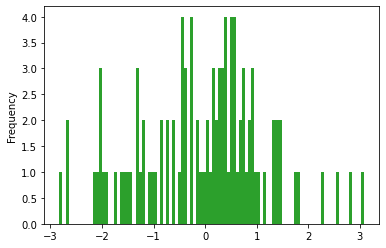

In [60]:
df['X'].plot(kind='hist',bins=100,color="C2")

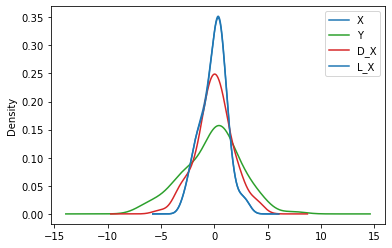

In [66]:
df.plot(kind='density',color=["C0","C2","C3"])

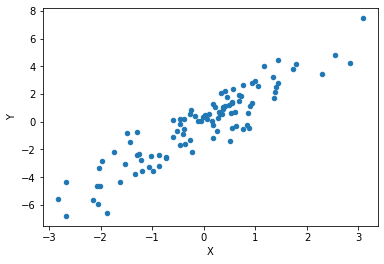

In [67]:
df.plot(kind='scatter',x="X",y="Y")

#### Groupby

Ok, now for the really cool one: `groupby`

Groupby takes an argument that is a discrete variable and then applies whatever built in function you call to each group.

In [75]:
df.groupby("D_X_neg").mean()

,X,Y,D_X,L_X
D_X_neg,,,,
False,0.606347,1.223307,1.280795,-0.671957
True,-0.742471,-1.691754,-1.334554,0.592083


In [76]:
df.groupby("D_X_neg").sum()

,X,Y,D_X,L_X
D_X_neg,,,,
False,30.923710,62.388675,64.039742,-33.597860
True,-36.381085,-82.895936,-65.393149,29.012064


A really useful application is __panel data__. If you have individual $i$ in time $t$, you can produce first differences of any variable by writing:

`df = df.sort_values(["i","t"])`

`df.groupby('i')['var'].diff()`

The first statement is key, because the `diff` function takes the difference based on the order its in the dataframe. By putting it in order first, you can use `diff` or `shift` to produce differences or lags.

__Note:__ `diff` and `shift` take an argument, which is how many periods you want to shift or diff (order of the lag or difference)

#### Apply and map
Crucially, you can also use your own functions in the dataframe.

- Element by element functions.
- Group by group functions.

__map__ is for Series, whereas __apply__ is for dataframes.

Suppose I wanted to add the word "dog" to the end of every value of a column. We want to use map for this, and you must write the function as if it is receiving a scalar input.

In [77]:
def add_dog(x):
    return str(round(x,2))+ "dog"

df['X'].map(add_dog).head()

0     0.48dog
1     0.18dog
2     -1.2dog
3     0.06dog
4    -0.51dog
Name: X, dtype: object

Lambda function version, for when you need a simple on the fly function:

In [ ]:
df['X'].map(lambda x: str(round(x,2)) + "dog").head()

If we need a function that applies across an axis, that is when we need __apply__, and you must write the function as if it is receiving a column or row.

In [79]:
def stringify(column):
    return column.astype(str).sum()

In [80]:
df.apply(stringify,axis=1)

0       0.481828044580253471.217099107425075nannanFalse
1     0.18022451772387396-0.2688688610143923-0.30160...
2     -1.2032641254002712-3.5876755819259794-1.38348...
3     0.059219153942448540.173871362996467051.262483...
4     -0.5140270131960792-0.6600425609476952-0.57324...
                            ...                        
95    0.17036124511175355-1.18305484488419221.904908...
96    0.0195564823998832450.4794954828258715-0.15080...
97    0.095380876383265620.55801103231722960.0758243...
98    -0.376722324995807050.1797434325962376-0.47210...
99    -0.8715797089294298-3.2163862810762582-0.49485...
Length: 100, dtype: object

In [82]:
df.apply(stringify,axis=0)

X          0.481828044580253470.18022451772387396-1.20326...
Y          1.217099107425075-0.2688688610143923-3.5876755...
D_X        nan-0.3016035268563795-1.3834886431241451.2624...
L_X        nan0.481828044580253470.18022451772387396-1.20...
D_X_neg    FalseTrueTrueFalseTrueFalseTrueTrueFalseTrueTr...
dtype: object

#### Group functions

Suppose we wanted to standardize a variable to mean 0 and standard deviation 1.

In [86]:
df["Z"] = np.random.randn(100)*.2 +5
df['Z'].describe()

count    100.000000
mean       5.010012
std        0.196541
min        4.491432
25%        4.914904
50%        5.013010
75%        5.091749
max        5.446700
Name: Z, dtype: float64

Let's write a function that does that:

In [87]:
def standardize(column):
    return (column - column.mean())/column.std()

In [88]:
standardize(df['Z']).mean(),standardize(df['Z']).std()

(-6.282196984841448e-15, 1.0)

__We can also do this operation group by group:__

In [89]:
df['Z_stdized_g'] = df.groupby("D_X_neg")['Z'].apply(standardize)

In [90]:
df.groupby("D_X_neg")['Z_stdized_g'].mean()

D_X_neg
False   -1.393221e-15
True     1.533920e-15
Name: Z_stdized_g, dtype: float64

Super handy for doing data cleaning procedures by groups.

### Another handy use of ".loc"
You can do a "find and replace" using .loc in your dataframe.

Suppose that you think all values of `X` below zero create mistakes in `Z`, and you want to replace values of `Z` with `NaN` if that is the case.

`.loc` allows you to do this kind of conditional replacement.

In [91]:
df.loc[df['X']<0,"Z"] = np.nan
df.head(10)

,X,Y,D_X,L_X,D_X_neg,Z,Z_stdized_g
0,0.481828,1.217099,NaN,NaN,False,5.295837,1.494195
1,0.180225,-0.268869,-0.301604,0.481828,True,5.374618,1.810738
2,-1.203264,-3.587676,-1.383489,0.180225,True,NaN,-0.828647
3,0.059219,0.173871,1.262483,-1.203264,False,5.238748,1.209160
4,-0.514027,-0.660043,-0.573246,0.059219,True,NaN,1.937817
5,0.442862,1.756933,0.956889,-0.514027,False,5.141830,0.725260
6,0.295100,0.692656,-0.147761,0.442862,True,5.200913,0.913648
7,-0.458395,-0.133077,-0.753495,0.295100,True,NaN,0.091188
8,1.785889,4.157278,2.244284,-0.458395,False,4.806441,-0.949280
9,1.357061,1.684411,-0.428828,1.785889,True,5.088238,0.331740


__Now what just happened there?__

Step by step:
- Inside `.loc`, it evaluated a condition: `df['X']<0`, which created a Boolean vector.
- We fed that boolean vector into the "row" position, and gave it the label `Z` for the column vector.
- We then __assigned a value__ to this __view__ of the dataframe, which was the missing value object `NaN`

We saw before how changing views of the data can lead to issues, but this is a case where it's very useful.

Still, be careful...

In [92]:
df_new = df

df_new['Z'] = df_new['Z'].fillna("Jim Davis")

df.head()

,X,Y,D_X,L_X,D_X_neg,Z,Z_stdized_g
0,0.481828,1.217099,NaN,NaN,False,5.29584,1.494195
1,0.180225,-0.268869,-0.301604,0.481828,True,5.37462,1.810738
2,-1.203264,-3.587676,-1.383489,0.180225,True,Jim Davis,-0.828647
3,0.059219,0.173871,1.262483,-1.203264,False,5.23875,1.209160
4,-0.514027,-0.660043,-0.573246,0.059219,True,Jim Davis,1.937817


It does __not do this__ when doing certain operations, however...

In [95]:
df_head = df.head()

df_head['X'] = "all Garfield"

df.head()

<ipython-input-95-89bb8de01125>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_head['X'] = "all Garfield"


,X,Y,D_X,L_X,D_X_neg,Z,Z_stdized_g
0,0.481828,1.217099,NaN,NaN,False,5.29584,1.494195
1,0.180225,-0.268869,-0.301604,0.481828,True,5.37462,1.810738
2,-1.203264,-3.587676,-1.383489,0.180225,True,Jim Davis,-0.828647
3,0.059219,0.173871,1.262483,-1.203264,False,5.23875,1.209160
4,-0.514027,-0.660043,-0.573246,0.059219,True,Jim Davis,1.937817


__Why didn't it change every row of `X` to "all Garfield"?__

__The short answer:__ Operations in Pandas (e.g. `.head()`) __always__ create copies of DataFrames. Therefore we edited a totally new DataFrame.

Pandas sends us a `SettingWithCopyWarning` to inform us that we are not modifying the original DataFrame.

__The good part:__ You can test out edits before doing it to your main DataFrame. I do this sometimes when I'm not sure what a data cleaning process will do and my data takes a long time to read in.

__The bad part:__ if you create a lot of dataframes, you can eat up memory very quickly.

If we wanted to make the first five rows of X "all Garfield," we can use `.loc` instead:

In [97]:
df.loc[:5,"X"] = "all Garfield"

df.head(20)

,X,Y,D_X,L_X,D_X_neg,Z,Z_stdized_g
0,all Garfield,1.217099,NaN,NaN,False,5.29584,1.494195
1,all Garfield,-0.268869,-0.301604,0.481828,True,5.37462,1.810738
2,all Garfield,-3.587676,-1.383489,0.180225,True,Jim Davis,-0.828647
3,all Garfield,0.173871,1.262483,-1.203264,False,5.23875,1.209160
4,all Garfield,-0.660043,-0.573246,0.059219,True,Jim Davis,1.937817
5,all Garfield,1.756933,0.956889,-0.514027,False,5.14183,0.725260
6,0.2951,0.692656,-0.147761,0.442862,True,5.20091,0.913648
7,-0.458395,-0.133077,-0.753495,0.295100,True,Jim Davis,0.091188
8,1.78589,4.157278,2.244284,-0.458395,False,4.80644,-0.949280
9,1.35706,1.684411,-0.428828,1.785889,True,5.08824,0.331740


__Pandas almost never does "in place" operations unless you tell it to__.

An example is if you wanted to drop columns. The following code will generate an entirely new dataframe without the column.

In [99]:
df

,X,Y,D_X,L_X,D_X_neg,Z,Z_stdized_g
0,all Garfield,1.217099,NaN,NaN,False,5.29584,1.494195
1,all Garfield,-0.268869,-0.301604,0.481828,True,5.37462,1.810738
2,all Garfield,-3.587676,-1.383489,0.180225,True,Jim Davis,-0.828647
3,all Garfield,0.173871,1.262483,-1.203264,False,5.23875,1.209160
4,all Garfield,-0.660043,-0.573246,0.059219,True,Jim Davis,1.937817
...,...,...,...,...,...,...,...
95,0.170361,-1.183055,1.904908,-1.734547,False,5.30889,1.559364
96,0.0195565,0.479495,-0.150805,0.170361,True,4.76326,-1.346612
97,0.0953809,0.558011,0.075824,0.019556,False,4.60341,-1.962981
98,-0.376722,0.179743,-0.472103,0.095381,True,Jim Davis,0.520737


In [100]:
df.drop("D_X",axis=1)

,X,Y,L_X,D_X_neg,Z,Z_stdized_g
0,all Garfield,1.217099,NaN,False,5.29584,1.494195
1,all Garfield,-0.268869,0.481828,True,5.37462,1.810738
2,all Garfield,-3.587676,0.180225,True,Jim Davis,-0.828647
3,all Garfield,0.173871,-1.203264,False,5.23875,1.209160
4,all Garfield,-0.660043,0.059219,True,Jim Davis,1.937817
...,...,...,...,...,...,...
95,0.170361,-1.183055,-1.734547,False,5.30889,1.559364
96,0.0195565,0.479495,0.170361,True,4.76326,-1.346612
97,0.0953809,0.558011,0.019556,False,4.60341,-1.962981
98,-0.376722,0.179743,0.095381,True,Jim Davis,0.520737


So you must assign it back if that's the DataFrame you want.

In [101]:
df = df.drop("D_X",axis=1).head()
df.head()

,X,Y,L_X,D_X_neg,Z,Z_stdized_g
0,all Garfield,1.217099,NaN,False,5.29584,1.494195
1,all Garfield,-0.268869,0.481828,True,5.37462,1.810738
2,all Garfield,-3.587676,0.180225,True,Jim Davis,-0.828647
3,all Garfield,0.173871,-1.203264,False,5.23875,1.209160
4,all Garfield,-0.660043,0.059219,True,Jim Davis,1.937817


You can, however, specify that it does it "in place," meaning it will modify the object and not generate a new one.

In [103]:
df

,X,Y,D_X_neg,Z,Z_stdized_g
0,all Garfield,1.217099,False,5.29584,1.494195
1,all Garfield,-0.268869,True,5.37462,1.810738
2,all Garfield,-3.587676,True,Jim Davis,-0.828647
3,all Garfield,0.173871,False,5.23875,1.209160
4,all Garfield,-0.660043,True,Jim Davis,1.937817


In [102]:
df.drop("L_X",axis=1,inplace=True)

### Data Merging in Pandas:
- `join` is for merging on indices; DataFrames must be the same size for this.
- `concat` is for concatenation like in Numpy.
- `merge` is for any of the above but includes many to one merges.
    - Instead of the "m:1" stuff Stata uses, it uses `left`, `right`, `outer` and `inner` (which comes from SQL).

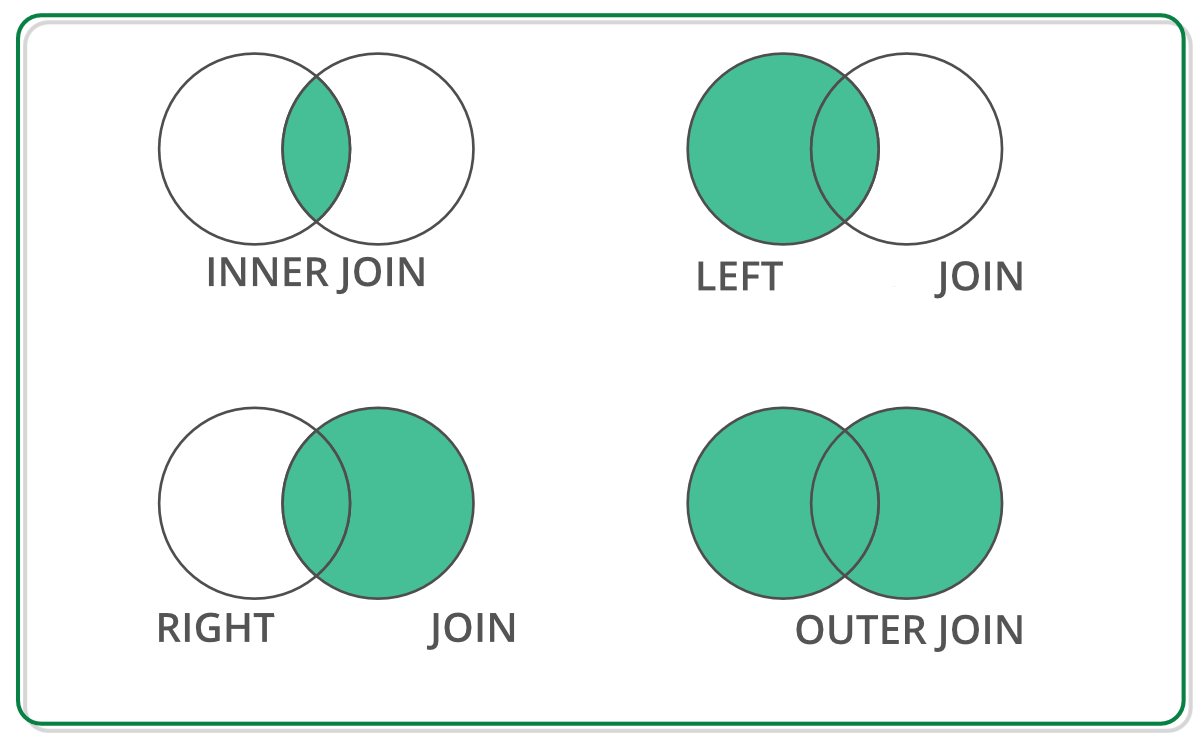


[Link to image](https://medium.com/swlh/merging-dataframes-with-pandas-pd-merge-7764c7e2d46d)

- inner: keep rows that match on the keys in __both__ dataframes.
- outer: keep __all__ rows __regardless__ of whether keys match.
- left: keep all rows in the right that match and all the left.
- right: inverse of left.

In [104]:
df['Jim Davis'] = df['Z'] == "Jim Davis"

Y_means = df.groupby("Jim Davis")['Y'].mean().reset_index()

df.merge(Y_means,on="Jim Davis",how="left",suffixes=("","_mean"))

,X,Y,D_X_neg,Z,Z_stdized_g,Jim Davis,Y_mean
0,all Garfield,1.217099,False,5.29584,1.494195,False,0.374034
1,all Garfield,-0.268869,True,5.37462,1.810738,False,0.374034
2,all Garfield,-3.587676,True,Jim Davis,-0.828647,True,-2.123859
3,all Garfield,0.173871,False,5.23875,1.209160,False,0.374034
4,all Garfield,-0.660043,True,Jim Davis,1.937817,True,-2.123859


__What did this code just do?__

Step-by-step:
- `df['Jim Davis'] = df['Z'] == "Jim Davis"` created a column called "Jim Davis" that is a Boolean vector.
- `Y_means = df.groupby("Jim Davis")['Y'].mean().reset_index()`
    - Groupby the variable "Jim Davis"
    - For the column Y, take the average for all levels of "Jim Davis"
    - Reset the index so that you have a DataFrame that looks like this:

In [105]:
df.groupby("Jim Davis")['Y'].mean().reset_index()

,Jim Davis,Y
0,False,0.374034
1,True,-2.123859


- `df.merge(Y_means,on="Jim Davis",how="left",suffixes=("","_mean"))`
    - Do a left merge with the DataFrame I just created.
    - Merge on the variable "Jim Davis."
    - When there are overlapping columns, give the one on in the "right" DataFrame the suffix "_mean"
    - The above option is because "Y" is in both DataFrames.

In [106]:
df.merge(Y_means,on="Jim Davis",how="left",suffixes=("","_mean"))

,X,Y,D_X_neg,Z,Z_stdized_g,Jim Davis,Y_mean
0,all Garfield,1.217099,False,5.29584,1.494195,False,0.374034
1,all Garfield,-0.268869,True,5.37462,1.810738,False,0.374034
2,all Garfield,-3.587676,True,Jim Davis,-0.828647,True,-2.123859
3,all Garfield,0.173871,False,5.23875,1.209160,False,0.374034
4,all Garfield,-0.660043,True,Jim Davis,1.937817,True,-2.123859


Another useful argument for `pd.merge()` is `indicator="string"`, which creates something like the Stata `_merge` variable.

In [107]:
df.merge(Y_means,on="Jim Davis",how="left",suffixes=("","_mean"),indicator="i")['i']

0    both
1    both
2    both
3    both
4    both
Name: i, dtype: category
Categories (3, object): [left_only, right_only, both]

Labeled "both" because the values of `Jim Davis` are found in both DataFrames. If we had something else it would mess up:

In [108]:
df.loc[df.Y>1,"Jim Davis"] = "Not Jim Davis"

In [109]:
df

,X,Y,D_X_neg,Z,Z_stdized_g,Jim Davis
0,all Garfield,1.217099,False,5.29584,1.494195,Not Jim Davis
1,all Garfield,-0.268869,True,5.37462,1.810738,False
2,all Garfield,-3.587676,True,Jim Davis,-0.828647,True
3,all Garfield,0.173871,False,5.23875,1.209160,False
4,all Garfield,-0.660043,True,Jim Davis,1.937817,True


In [112]:
df.merge(Y_means,on="Jim Davis",how="left",suffixes=("","_mean"),indicator="_merge")

,X,Y,D_X_neg,Z,Z_stdized_g,Jim Davis,Y_mean,_merge
0,all Garfield,1.217099,False,5.29584,1.494195,Not Jim Davis,NaN,left_only
1,all Garfield,-0.268869,True,5.37462,1.810738,False,0.374034,both
2,all Garfield,-3.587676,True,Jim Davis,-0.828647,True,-2.123859,both
3,all Garfield,0.173871,False,5.23875,1.209160,False,0.374034,both
4,all Garfield,-0.660043,True,Jim Davis,1.937817,True,-2.123859,both


### Reading data in to Pandas.
In addition to converting from dictionaries and arrays, Pandas reads from almost every file format.
- `pd.read_csv` for .csv files.
- `pd.read_html` for .html files (we will use this when doing scraping).
- `pd.read_stata` for Stata data files.
- `pd.read_json` for .json files (we will use this when retreiving API data).

### Pandas vs. Stata
- In Stata, there is __only one dataframe in memory at a time__. In Pandas these are objects and there can be as many in memory as you can hold.
- Everything you do in Stata is "in place." In Pandas this will __only happen if you specify it__.
- When merging or joining, Pandas needs both DataFrames read into memory; this can be an issue if they are very big and requires you to use "chunking" or other work arounds.

For other questions comparing pandas and Stata, I recommend consulting [this link](http://www.danielmsullivan.com/pages/tutorial_stata_to_python.html)

If you want to compare to R, [consult this link](https://towardsdatascience.com/cheat-sheet-for-python-dataframe-r-dataframe-syntax-conversions-450f656b44ca)